In [1]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# combine all csv in sls folder and open as dataframe
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "sls/*.csv"))))
df


,file,route,distance,time
0,tsp-problem-100-100-100-25-1.txt,"[0, 79, 19, 49, 78, 51, 76, 83, 5, 99, 50, 66,...",4530.149759,0.116892
1,tsp-problem-100-100-100-5-1.txt,"[0, 4, 26, 51, 34, 50, 57, 75, 36, 29, 37, 56,...",9049.423296,0.087548
2,tsp-problem-100-1000-100-25-1.txt,"[0, 67, 71, 68, 34, 79, 53, 9, 72, 66, 38, 88,...",4639.555596,0.172714
3,tsp-problem-100-1000-100-5-1.txt,"[0, 59, 22, 53, 34, 95, 92, 5, 1, 46, 12, 23, ...",8939.386135,0.130274
4,tsp-problem-100-2000-100-25-1.txt,"[0, 79, 59, 33, 6, 19, 29, 68, 26, 96, 76, 24,...",4945.849543,0.124936
...,...,...,...,...
95,tsp-problem-800-32000-100-5-1.txt,"[0, 79, 416, 688, 352, 610, 749, 537, 519, 682...",69807.078261,4.585617
96,tsp-problem-800-6400-100-25-1.txt,"[0, 303, 699, 125, 596, 538, 631, 158, 179, 68...",23341.404550,20.855783
97,tsp-problem-800-6400-100-5-1.txt,"[0, 13, 347, 744, 206, 731, 427, 481, 732, 506...",69515.251528,4.711348
98,tsp-problem-800-64000-100-25-1.txt,"[0, 2, 684, 68, 454, 794, 445, 406, 399, 421, ...",26078.302019,10.709082


In [3]:
# get the file which has 1000 in it's name
file = df[df['file'].str.startswith('tsp-problem-1000-4')]['file'].values[0]
file

'tsp-problem-1000-400000-100-25-1.txt'

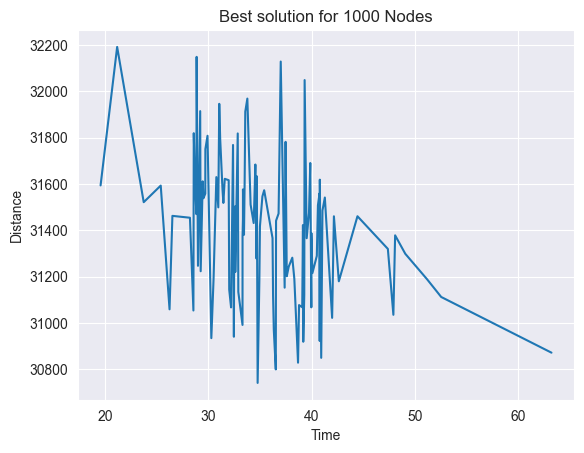

In [4]:
# plot the best solution distance vs time
sns.lineplot(data=df[df['file'] == file], x="time", y="distance")
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title(f'Best solution for {df[df["file"] == file]["file"].values[0].split('-')[2]} Nodes')
plt.show()


In [5]:
# add a new column with node number
df['nodes'] = df['file'].str.split('-').str[2]
df


,file,route,distance,time,nodes
0,tsp-problem-100-100-100-25-1.txt,"[0, 79, 19, 49, 78, 51, 76, 83, 5, 99, 50, 66,...",4530.149759,0.116892,100
1,tsp-problem-100-100-100-5-1.txt,"[0, 4, 26, 51, 34, 50, 57, 75, 36, 29, 37, 56,...",9049.423296,0.087548,100
2,tsp-problem-100-1000-100-25-1.txt,"[0, 67, 71, 68, 34, 79, 53, 9, 72, 66, 38, 88,...",4639.555596,0.172714,100
3,tsp-problem-100-1000-100-5-1.txt,"[0, 59, 22, 53, 34, 95, 92, 5, 1, 46, 12, 23, ...",8939.386135,0.130274,100
4,tsp-problem-100-2000-100-25-1.txt,"[0, 79, 59, 33, 6, 19, 29, 68, 26, 96, 76, 24,...",4945.849543,0.124936,100
...,...,...,...,...,...
95,tsp-problem-800-32000-100-5-1.txt,"[0, 79, 416, 688, 352, 610, 749, 537, 519, 682...",69807.078261,4.585617,800
96,tsp-problem-800-6400-100-25-1.txt,"[0, 303, 699, 125, 596, 538, 631, 158, 179, 68...",23341.404550,20.855783,800
97,tsp-problem-800-6400-100-5-1.txt,"[0, 13, 347, 744, 206, 731, 427, 481, 732, 506...",69515.251528,4.711348,800
98,tsp-problem-800-64000-100-25-1.txt,"[0, 2, 684, 68, 454, 794, 445, 406, 399, 421, ...",26078.302019,10.709082,800


In [6]:
# for each unique number, take one random value from file column and then get all it's columns
df_unique = df.groupby('nodes').apply(lambda x: x.sample(1)).reset_index(drop=True)
df_unique


,file,route,distance,time,nodes
0,tsp-problem-100-4000-100-25-1.txt,"[0, 48, 83, 33, 5, 21, 36, 20, 91, 7, 84, 79, ...",4775.100860,0.328846,100
1,tsp-problem-1000-400000-100-25-1.txt,"[0, 334, 264, 438, 311, 286, 102, 344, 733, 94...",31541.342971,41.281991,1000
2,tsp-problem-200-16000-100-5-1.txt,"[0, 130, 145, 91, 165, 52, 74, 154, 158, 72, 7...",17875.794228,0.551111,200
3,tsp-problem-25-62-100-5-1.txt,"[0, 14, 7, 5, 23, 8, 11, 18, 13, 9, 15, 21, 2,...",2332.813269,0.015627,25
4,tsp-problem-300-9000-100-5-1.txt,"[0, 107, 47, 120, 117, 149, 229, 72, 146, 188,...",26573.152286,2.011185,300
5,tsp-problem-400-64000-100-5-1.txt,"[0, 102, 126, 105, 313, 98, 333, 231, 217, 160...",35157.300973,2.288201,400
6,tsp-problem-50-125-100-5-1.txt,"[0, 6, 30, 20, 25, 49, 14, 3, 47, 44, 46, 43, ...",4528.874724,0.029051,50
7,tsp-problem-600-18000-100-25-1.txt,"[0, 579, 26, 522, 243, 206, 155, 292, 519, 148...",20287.601207,12.632349,600
8,tsp-problem-75-1125-100-5-1.txt,"[0, 3, 11, 73, 25, 32, 26, 16, 21, 28, 5, 23, ...",6818.203167,0.051344,75
9,tsp-problem-800-64000-100-5-1.txt,"[0, 45, 383, 164, 211, 449, 245, 233, 268, 560...",69741.694263,8.175916,800


In [7]:
# for each file in df_unique, get the standard deviation of the distance from df
df_unique['std'] = df_unique.apply(lambda x: df[df['file'] == x['file']]['distance'].std(), axis=1)
df_unique


,file,route,distance,time,nodes,std
0,tsp-problem-100-4000-100-25-1.txt,"[0, 48, 83, 33, 5, 21, 36, 20, 91, 7, 84, 79, ...",4775.100860,0.328846,100,61.005153
1,tsp-problem-1000-400000-100-25-1.txt,"[0, 334, 264, 438, 311, 286, 102, 344, 733, 94...",31541.342971,41.281991,1000,313.912677
2,tsp-problem-200-16000-100-5-1.txt,"[0, 130, 145, 91, 165, 52, 74, 154, 158, 72, 7...",17875.794228,0.551111,200,36.200706
3,tsp-problem-25-62-100-5-1.txt,"[0, 14, 7, 5, 23, 8, 11, 18, 13, 9, 15, 21, 2,...",2332.813269,0.015627,25,7.793474
4,tsp-problem-300-9000-100-5-1.txt,"[0, 107, 47, 120, 117, 149, 229, 72, 146, 188,...",26573.152286,2.011185,300,44.851005
5,tsp-problem-400-64000-100-5-1.txt,"[0, 102, 126, 105, 313, 98, 333, 231, 217, 160...",35157.300973,2.288201,400,52.452670
6,tsp-problem-50-125-100-5-1.txt,"[0, 6, 30, 20, 25, 49, 14, 3, 47, 44, 46, 43, ...",4528.874724,0.029051,50,15.636160
7,tsp-problem-600-18000-100-25-1.txt,"[0, 579, 26, 522, 243, 206, 155, 292, 519, 148...",20287.601207,12.632349,600,218.623433
8,tsp-problem-75-1125-100-5-1.txt,"[0, 3, 11, 73, 25, 32, 26, 16, 21, 28, 5, 23, ...",6818.203167,0.051344,75,14.313836
9,tsp-problem-800-64000-100-5-1.txt,"[0, 45, 383, 164, 211, 449, 245, 233, 268, 560...",69741.694263,8.175916,800,60.127365


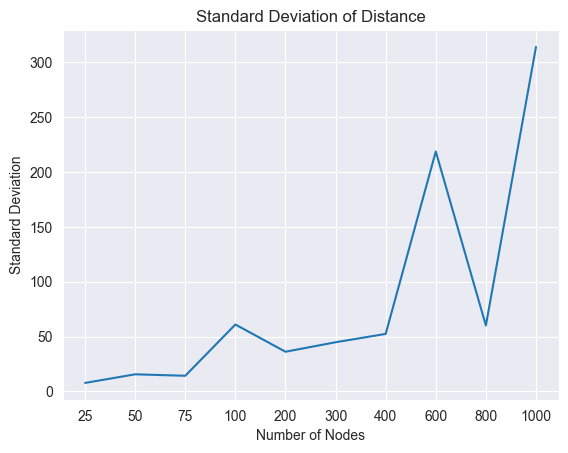

In [8]:
# plot the standard deviation of the distance vs number of nodes
# sort by number of nodes as int
sns.lineplot(data=df_unique.sort_values(by='nodes', key=lambda x: [int(i) for i in x]), x="nodes", y="std")
plt.xlabel('Number of Nodes')
plt.ylabel('Standard Deviation')
plt.title(f'Standard Deviation of Distance')
plt.show()


In [9]:
# compare to the best known solution
optimal = pd.read_csv('optimal_results.csv')
optimal


,file,path,cost
0,tsp-problem-100-100-100-25-1.txt,"[0, 63, 88, 89, 60, 48, 79, 19, 54, 90, 45, 92...",4270.953731
1,tsp-problem-100-100-100-5-1.txt,"[0, 18, 35, 46, 81, 79, 44, 23, 70, 38, 77, 32...",8980.986263
2,tsp-problem-100-1000-100-25-1.txt,"[0, 22, 74, 99, 42, 80, 48, 69, 32, 75, 9, 72,...",4428.841580
3,tsp-problem-100-1000-100-5-1.txt,"[0, 32, 9, 84, 90, 56, 82, 38, 55, 36, 99, 94,...",8880.630134
4,tsp-problem-100-2000-100-25-1.txt,"[0, 64, 2, 1, 39, 28, 65, 67, 16, 72, 12, 27, ...",4669.325701
...,...,...,...
95,tsp-problem-800-32000-100-5-1.txt,"[0, 681, 253, 21, 393, 113, 389, 24, 672, 615,...",68591.994400
96,tsp-problem-800-6400-100-25-1.txt,"[0, 665, 188, 166, 11, 145, 81, 209, 200, 449,...",19882.746865
97,tsp-problem-800-6400-100-5-1.txt,"[0, 678, 675, 356, 404, 371, 157, 33, 668, 46,...",68472.190155
98,tsp-problem-800-64000-100-25-1.txt,"[0, 647, 688, 408, 391, 403, 427, 479, 576, 61...",22769.249956


In [10]:
df['optimal'] = df['file'].map(optimal.set_index('file')['cost'])
df


,file,route,distance,time,nodes,optimal
0,tsp-problem-100-100-100-25-1.txt,"[0, 79, 19, 49, 78, 51, 76, 83, 5, 99, 50, 66,...",4530.149759,0.116892,100,4270.953731
1,tsp-problem-100-100-100-5-1.txt,"[0, 4, 26, 51, 34, 50, 57, 75, 36, 29, 37, 56,...",9049.423296,0.087548,100,8980.986263
2,tsp-problem-100-1000-100-25-1.txt,"[0, 67, 71, 68, 34, 79, 53, 9, 72, 66, 38, 88,...",4639.555596,0.172714,100,4428.841580
3,tsp-problem-100-1000-100-5-1.txt,"[0, 59, 22, 53, 34, 95, 92, 5, 1, 46, 12, 23, ...",8939.386135,0.130274,100,8880.630134
4,tsp-problem-100-2000-100-25-1.txt,"[0, 79, 59, 33, 6, 19, 29, 68, 26, 96, 76, 24,...",4945.849543,0.124936,100,4669.325701
...,...,...,...,...,...,...
95,tsp-problem-800-32000-100-5-1.txt,"[0, 79, 416, 688, 352, 610, 749, 537, 519, 682...",69807.078261,4.585617,800,68591.994400
96,tsp-problem-800-6400-100-25-1.txt,"[0, 303, 699, 125, 596, 538, 631, 158, 179, 68...",23341.404550,20.855783,800,19882.746865
97,tsp-problem-800-6400-100-5-1.txt,"[0, 13, 347, 744, 206, 731, 427, 481, 732, 506...",69515.251528,4.711348,800,68472.190155
98,tsp-problem-800-64000-100-25-1.txt,"[0, 2, 684, 68, 454, 794, 445, 406, 399, 421, ...",26078.302019,10.709082,800,22769.249956


In [11]:
df['gap'] = (df['distance'] - df['optimal']) / df['optimal'] * 100
df['nodes'] = df['file'].str.split('-').str[2]
df


,file,route,distance,time,nodes,optimal,gap
0,tsp-problem-100-100-100-25-1.txt,"[0, 79, 19, 49, 78, 51, 76, 83, 5, 99, 50, 66,...",4530.149759,0.116892,100,4270.953731,6.068809
1,tsp-problem-100-100-100-5-1.txt,"[0, 4, 26, 51, 34, 50, 57, 75, 36, 29, 37, 56,...",9049.423296,0.087548,100,8980.986263,0.762021
2,tsp-problem-100-1000-100-25-1.txt,"[0, 67, 71, 68, 34, 79, 53, 9, 72, 66, 38, 88,...",4639.555596,0.172714,100,4428.841580,4.757768
3,tsp-problem-100-1000-100-5-1.txt,"[0, 59, 22, 53, 34, 95, 92, 5, 1, 46, 12, 23, ...",8939.386135,0.130274,100,8880.630134,0.661620
4,tsp-problem-100-2000-100-25-1.txt,"[0, 79, 59, 33, 6, 19, 29, 68, 26, 96, 76, 24,...",4945.849543,0.124936,100,4669.325701,5.922136
...,...,...,...,...,...,...,...
95,tsp-problem-800-32000-100-5-1.txt,"[0, 79, 416, 688, 352, 610, 749, 537, 519, 682...",69807.078261,4.585617,800,68591.994400,1.771466
96,tsp-problem-800-6400-100-25-1.txt,"[0, 303, 699, 125, 596, 538, 631, 158, 179, 68...",23341.404550,20.855783,800,19882.746865,17.395271
97,tsp-problem-800-6400-100-5-1.txt,"[0, 13, 347, 744, 206, 731, 427, 481, 732, 506...",69515.251528,4.711348,800,68472.190155,1.523336
98,tsp-problem-800-64000-100-25-1.txt,"[0, 2, 684, 68, 454, 794, 445, 406, 399, 421, ...",26078.302019,10.709082,800,22769.249956,14.532987


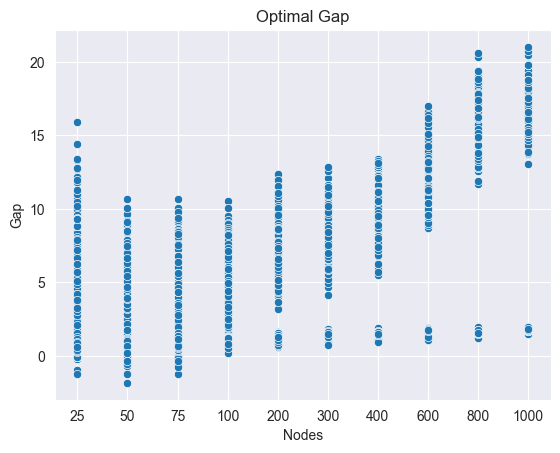

In [12]:
sns.scatterplot(data=df.sort_values(by='nodes', key=lambda x: [int(i) for i in x]), x="nodes", y="gap")
plt.xlabel('Nodes')
plt.ylabel('Gap')
plt.title(f'Optimal Gap')
plt.show()


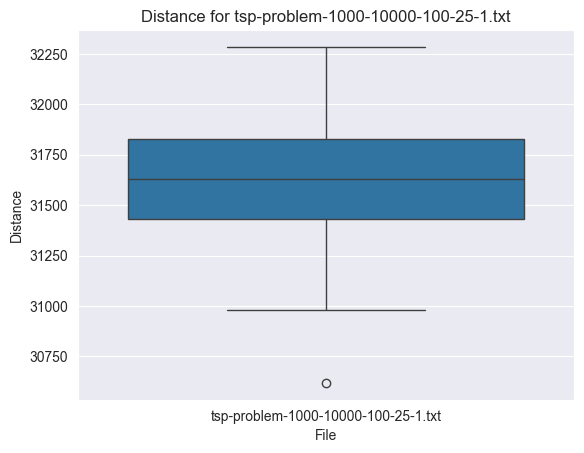

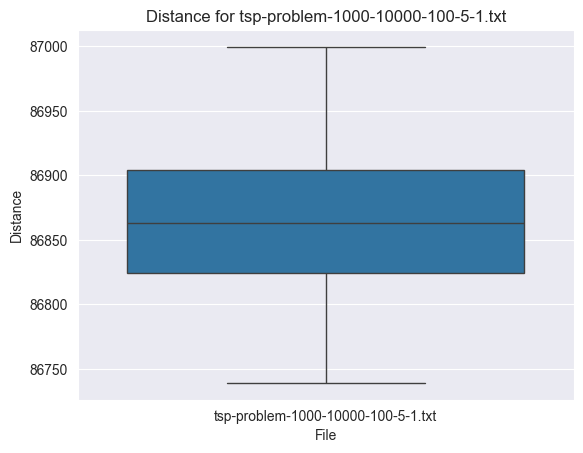

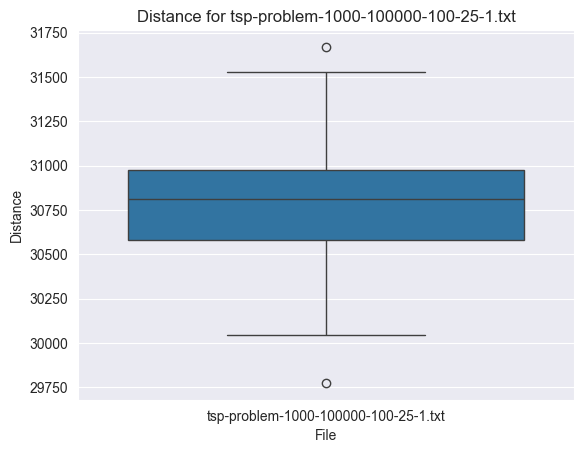

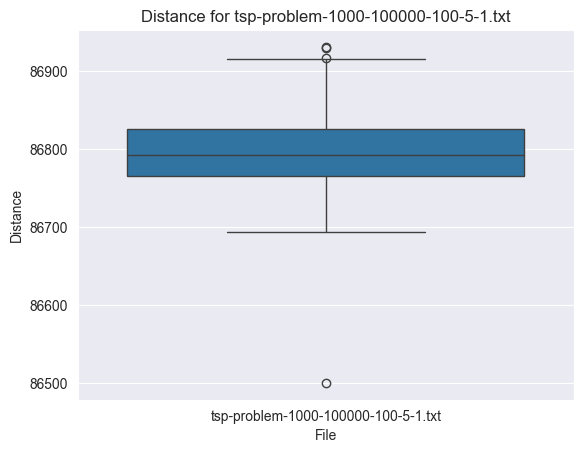

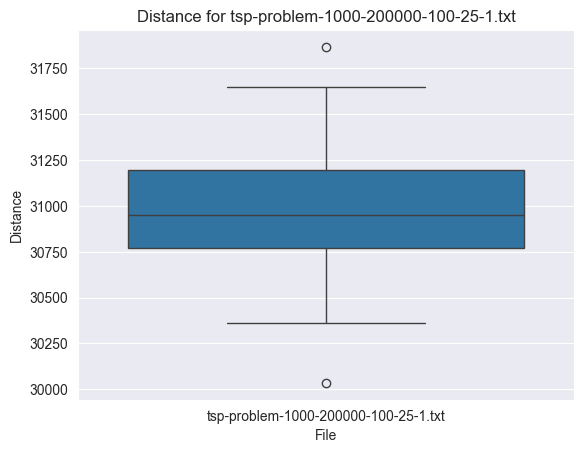

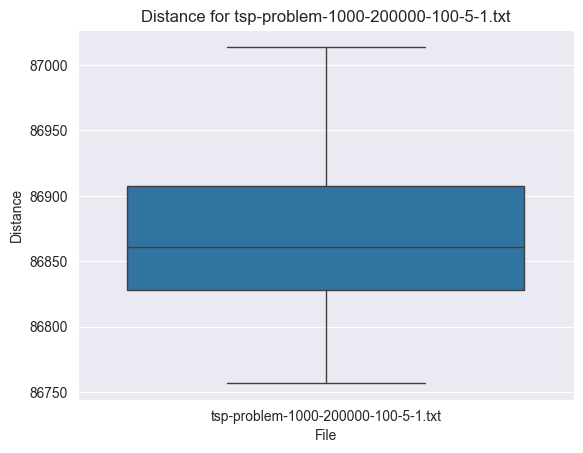

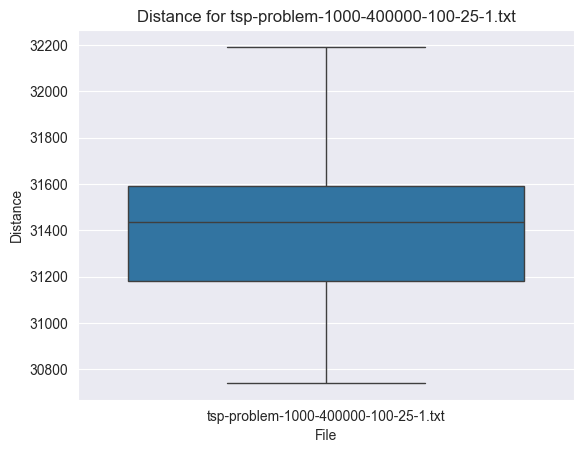

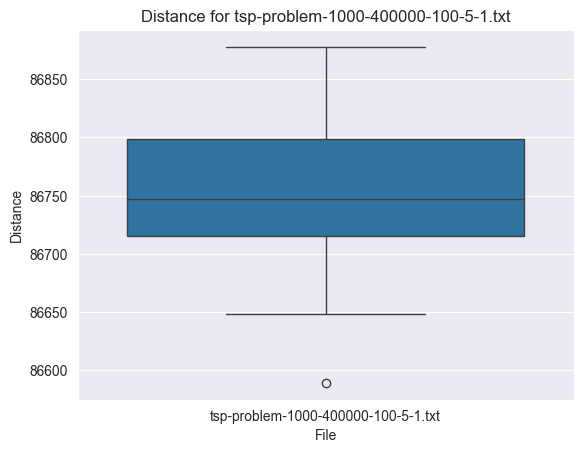

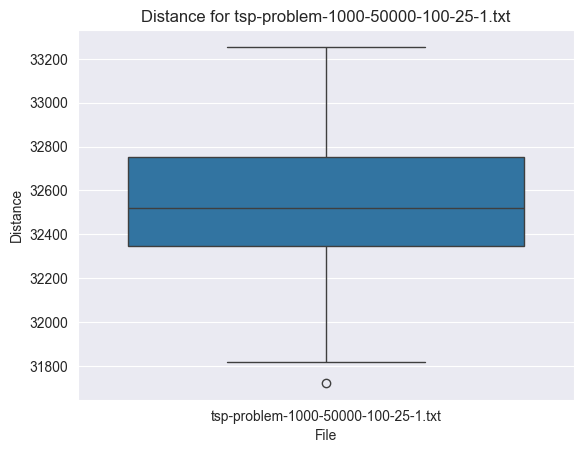

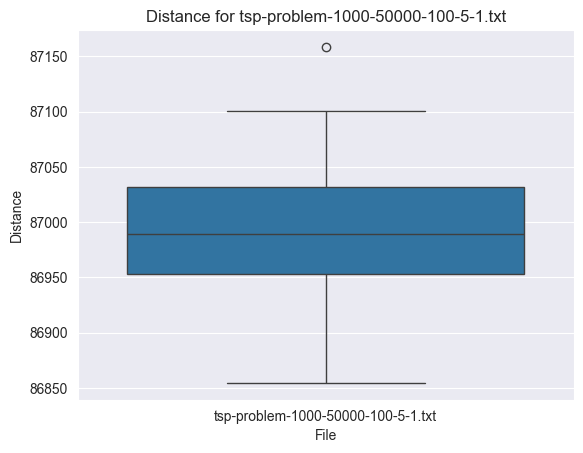

In [13]:
# for file, create a box plot of the values of the distance
for file in df['file'].unique():
    if file.split('-')[2] == '1000':
        sns.boxplot(data=df[df['file'] == file], x="file", y="distance")
        plt.xlabel('File')
        plt.ylabel('Distance')
        plt.title(f'Distance for {file}')
        plt.show()